## Exam II: CSCI4390-6390 (100 points)

This is a take-home exam. It is due 11:59:59pm on Thursday, Nov 3 via submitty. You are expected to abide by the honor code, i.e., all work must be your own, and you are not allowed to discuss any aspect of exam with anyone except the TA or the professor. You are also not allowed to use the internet except to lookup numpy/python documentation, the book site, class notes/videos, or to ask clarification questions on campuswire. **You cannot use any other library other than numpy (e.g., no pytorch, sklearn, etc); you can use pandas only for data processing**. You must sign the declaration below that you will abide by the honor code.

#### **Honor Code Declaration**: Please sign with your name to acknowledge that you agree to abide by the honor code, and demonstrate the highest level of academic integrity.

Xinshi Wang

#### Download Dataset: Download the [Seeds Dataset](https://archive.ics.uci.edu/ml/datasets/seeds). It has 9 attributes, and 210 points. The last attribute is the class variable. Store the dataset in your current directory and use "./seeds_dataset.txt" as its name. **DO NOT** submit the dataset as part of your answer on submitty.

In [228]:
import pandas as pd
import numpy as np
np.random.seed(42)
dataset = open('seeds_dataset.txt', 'r')
dataset_list = []
for line in dataset:
    data = line.strip().split('\t')
    while '' in data:
        data.remove('')
    assert(len(data) == 8)
    dataset_list.append([float(data[i]) for i in range(8)])
dataset = np.array(pd.DataFrame(data = np.array(dataset_list), columns=range(8)))

In [229]:
dataset

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

#### Q1. Linear Regression: (Total 25 points)  For this question, we will use the first attribute as the target, and you will ignore the last attribute, which is the class. We will use linear regression to predict the target via the geometric approach. Answer the following:

##### a) (10 points) First find and print the orthogonal basis vectors (without unit normalization) for the independent attributes; print the first three and last three values of each basis vector. You cannot call numpy QR or simialr function for this.

##### b) (5 points) Next find and print the predicted vector, and show the squared error. You may not use numpy QR or similar function for this problem. 

##### c) (5 points) Find and print the regression coefficient or weight vector, using any method of choice. You can use the numpy inv function.

##### d) (5 points) Plot the scatter plot and regression line for the target versus the first attribute. Note: do not center the data, and do not run a separate regression for this. You must plot the effect of 1st attribute based on the full multivariate regression.

a).

In [230]:
def augment_by_one(data):
    ones = np.ones(data.shape[0]).reshape(-1,1)
    augmented_data = np.hstack((ones,data))
    return augmented_data

In [231]:
q1_train_x = augment_by_one(np.copy(dataset[:,1:7]))
q1_train_y = np.copy(dataset[:,0])

In [232]:
def proj(X_i,U_j):
    return np.dot(X_i.T,U_j)/(np.dot(U_j.T,U_j))
def norm(X):
    return np.sqrt(np.dot(X.T,X))

In [233]:
Q = np.zeros(shape = q1_train_x.shape)
for i in range(q1_train_x.shape[1]):
    X_i = np.array(q1_train_x[:,i],copy = True,dtype=np.float64)
    X_i_proj = np.array(q1_train_x[:,i],copy = True,dtype=np.float64)
    j = 0
    while j < i:
        U_j = np.array(Q[:,j],copy = True)
        X_i -= proj(X_i_proj,U_j)*U_j
        j += 1
    Q[:,i] = X_i

In [234]:
R = np.eye(q1_train_x.shape[1],dtype = np.float64)
for i in range(q1_train_x.shape[1]):
    for j in range(i+1,q1_train_x.shape[1]):
        R[i,j] = proj(q1_train_x[:,j],Q[:,i]).astype(np.float64)

In [235]:
print('The first three vectors are:')
print(Q[:3,:].T)
print('The last three vectors are:')
print(Q[-3:,:].T)

The first three vectors are:
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 2.80714286e-01  1.07142857e-02 -4.69285714e-01]
 [-2.68666067e-03  9.99882975e-03  3.84952572e-02]
 [ 3.15891940e-02 -3.98544924e-02 -3.55914391e-02]
 [-2.16672272e-03  6.39689071e-03 -2.32061234e-02]
 [-1.42209631e+00 -2.56912585e+00 -1.96882473e-01]
 [-2.62296882e-01 -2.41113780e-01 -1.18489995e-01]]
The last three vectors are:
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-8.99285714e-01 -1.34928571e+00 -1.21928571e+00]
 [ 2.59128900e-02 -5.97795927e-03  9.07717498e-03]
 [ 3.18120675e-03 -3.12412250e-02  5.14086335e-02]
 [ 6.91857121e-02 -2.46484383e-02  4.88237671e-03]
 [ 4.27131323e+00 -3.53448753e-01  1.79274780e+00]
 [-5.72193143e-02  8.47947022e-02  9.73647506e-03]]


b).

In [236]:
for i in range(Q.shape[1]):
    if (i == 0):
        result = proj(q1_train_y,Q[:,i])*Q[:,i]
    else:
        result += proj(q1_train_y,Q[:,i])*Q[:,i]

In [237]:
def SSE(pred,y):
    return np.sum(np.square(pred-y))
def TSS(pred,y):
    return np.sum(np.square(pred-y.mean()))

In [238]:
print(f'SSE is {SSE(result,q1_train_y)}')

SSE is 2.522217722717802


c).

In [239]:
delta_inv = np.eye(q1_train_x.shape[1])
for i in range(q1_train_x.shape[1]):
    delta_inv[i][i] = 1/(norm(Q[:,i])**2)
w = np.dot(np.dot(np.dot(np.linalg.inv(R),delta_inv),Q.T),q1_train_y)
w

array([-2.43833454e+01,  1.79696033e+00,  1.03270812e+01, -1.15968228e-01,
        9.45077486e-01,  5.24042440e-03,  3.00891684e-01])

d).

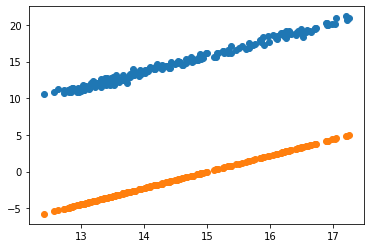

In [240]:
import matplotlib.pyplot as plt
plt.scatter(q1_train_x[:,1],q1_train_y)
plt.scatter(q1_train_x[:,1],result-sum([proj(q1_train_y,Q[:,i])*Q[:,i] for i in [0,2,3,4,5,6]],1))

The blue one is the scatter plot, and the orange one is the regression line from the first attribute

#### Q2. Logistic Regression: (Total 25 points)  For this question use all attributes as independent, except for the last one, which will be used as the caterogical target or class variable for multiclass logistic regression. 

##### a) (15 points) Show the weight vector for each class after exactly 4 iterations of **batch** gradient descent. That is, you may not use stochastic gradient descent, but rather you should used the batch gradient computed over all points (given on top of page 633) for each class $j$. Initialize the weight matrix $W$ as follows: 

[[0.37454012, 0.95071431, 0.73199394],
   
[0.59865848, 0.15601864, 0.15599452],

[0.05808361, 0.86617615, 0.60111501],

[0.70807258, 0.02058449, 0.96990985],

[0.83244264, 0.21233911, 0.18182497],

[0.18340451, 0.30424224, 0.52475643],

[0.43194502, 0.29122914, 0.61185289],

[0.13949386, 0.29214465, 0.36636184]]

##### Where each column of $W$ gives the weight for the corresponding class. Use step size $\eta = 10^{-5}$. You may use scipy.special.softmax.

##### b) (5 points) Compute the cross entropy for the data after exactly 4 iterations.

##### c) (5 points) What is the log-odds ratio for class 1 versus class 3 for attribute 1 after 4 iterations?

a).

In [241]:
def one_hot_encoding(data):
    num_count = set()
    for i in data:
        num_count.add(i)
    data = np.copy(data)
    zeros = np.zeros((data.shape[0],len(num_count)))
    for i in range(data.shape[0]):
        zeros[i,int(data[i])-1] = 1
    return zeros

In [242]:
q2_train_x = augment_by_one(np.copy(dataset[:,:-1]))
q2_train_y = one_hot_encoding(np.copy(dataset[:,-1]))
lr_w = np.array([[0.37454012, 0.95071431, 0.73199394],
   
[0.59865848, 0.15601864, 0.15599452],

[0.05808361, 0.86617615, 0.60111501],

[0.70807258, 0.02058449, 0.96990985],

[0.83244264, 0.21233911, 0.18182497],

[0.18340451, 0.30424224, 0.52475643],

[0.43194502, 0.29122914, 0.61185289],

[0.13949386, 0.29214465, 0.36636184]])

In [243]:
from scipy.special import softmax
def multi_class_logistic_regression(initial_weight,eps,lr,max_iter,X,y,print_iter):
    weights_prev = np.copy(initial_weight.T)
    weights_next = np.copy(weights_prev)
    l1_norm = np.Inf
    t = 0
    index = [i for i in range(X.shape[0])]
    while l1_norm > eps and t<max_iter: 
        np.random.shuffle(index)
        grad = [np.zeros(X[0].shape)]*(y.shape[1]-1)
        for k_index in index:
            pi = softmax(np.dot(weights_next,X[k_index]))
            for i in range(y.shape[1]-1):
                grad[i] += (y[k_index][i] - pi[i])*X[k_index]
        for i in range(y.shape[1]-1):
            weights_next[i] = weights_next[i]+lr*grad[i]
        t += 1
        l1_norm = np.linalg.norm((weights_next - weights_prev))
        if t%print_iter ==0:
            print(f'iteration {t} with weight difference {l1_norm}')
        weights_prev = np.copy(weights_next)
    return weights_next

In [244]:
weight = multi_class_logistic_regression(lr_w,1e-4,1e-5,4,q2_train_x,q2_train_y,1)

iteration 1 with weight difference 0.004048976570231006
iteration 2 with weight difference 0.0033955493268850996
iteration 3 with weight difference 0.002869472654813818
iteration 4 with weight difference 0.0024575472019295248


In [245]:
weight

array([[0.37390839, 0.5959265 , 0.05180733, 0.70757262, 0.82976705,
        0.18226472, 0.42780824, 0.13670785],
       [0.95008258, 0.15328666, 0.85989987, 0.02008453, 0.20966352,
        0.30310245, 0.28709236, 0.28935864],
       [0.73199394, 0.15599452, 0.60111501, 0.96990985, 0.18182497,
        0.52475643, 0.61185289, 0.36636184]])

b).

In [246]:
def cross_entropy(y,y_pre):
  loss=np.sum(y*np.log(1/y_pre)+(1-y)*np.log(1/(1-y_pre)))
  return loss

In [247]:
def prediction(weight,X,y):
    y_pred = np.zeros(y.shape)
    for i in range(X.shape[0]):
        y_pred[i] = softmax(weight@X[i])
    return y_pred

In [248]:
q2_pred = prediction(weight,q2_train_x,q2_train_y)

In [249]:
cross_entropy(q2_train_y,q2_pred)

492.8108301788774

c).

In [250]:
log_odds_1 = np.zeros(8)
for i in range(q2_train_x[:,1].shape[0]):
    log_odds_1 += weight[0,:]*q2_train_x[:,1][i]
log_odds_3 = np.zeros(8)
for i in range(q2_train_x[:,3].shape[0]):
    log_odds_3 += weight[2,:]*q2_train_x[:,3][i]
log_odds_1/log_odds_3

array([ 8.70751656, 65.12083277,  1.46916376, 12.43587185, 77.79277227,
        5.92081433, 11.9189697 ,  6.36091829])

#### Q3. SVM: (Total 25 points) CSCI4390 must use linear kernel, and CSCI6390 must use quadratic homogeneous kernel with $c=0$ for this question. Find the $\mathbf{\alpha}$ values via the stochastic GD method for SVM training. Use the last attribute as the class variable, but with +1 denoting class 1, and -1 denoting the other two classes. Set the random seed to 42, and initilize $\mathbf{\alpha}$ randomly. Use $C=1$, convergence thrshold $\epsilon=0.001$ and maxiter=1000. Use hinge loss. Set step size as the inverse of the self-kernel value for each point. Answer the following questions:

##### a) (10 points) Print the $\mathbf{\alpha}$ vector. How many non-zero values does $\mathbf{\alpha}$ have. What do those signify?

##### b) (5 points) Find the weight vector $\mathbf{w}$ and the bias $b$.

##### c) (5 points) What is the signed distance of the point at index 70 in the data to the SVM hyperplane $h(\mathbf{x})=0$ (counting from 0). In what region does the point lie: within or outside the margin, and correctly or incorrectly classified.

##### d) (5 points) What is the effective margin of the hyperplane if we ignore incorrectly classified points. What would be the equation of the canonical hyperplane in this case.

a).

In [251]:
def convert_label(threshold,label):
    new_label = np.copy(label)
    for i,val in enumerate(label):
        if (val <= threshold):
            new_label[i] = 1
        else:
            new_label[i] = -1
    return new_label

In [252]:
q3_train_x = np.copy(dataset[:,:-1])
q3_train_y = convert_label(1,np.copy(dataset[:,-1]))

In [253]:
import math
def generate_kernel(dataset,kernel,spread = None,dataset1 = None):
    if dataset1 == None:
        dataset1 = np.copy(dataset)
    empty_kernel = np.zeros((dataset.shape[0],dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(i,dataset.shape[0]):
            X = dataset[i,:]
            Y = dataset1[j,:]
            if kernel == 'linear':
                K_ij = compute_linear_kernel(X,Y)
            if kernel == 'gaussian':
                K_ij = compute_gaussian_kernel(X,Y,spread)
            empty_kernel[i][j] = K_ij
            empty_kernel[j][i] = K_ij
    return  empty_kernel

def compute_linear_kernel(X,Y):
    return np.dot(X.T,Y)     
def _compute_linear_kernel(X,Y):
    return np.dot(X,Y.T)     
def compute_gaussian_kernel(X,Y,spread):
	return np.exp(-1 * (np.linalg.norm(X - Y)**2 / (2 * spread)) )
def _gaussian_kernel(data_matrix_1, data_matrix_2, spread):
    kernel_matrix = np.zeros((len(data_matrix_1), len(data_matrix_2)))
    for i in range(len(data_matrix_1)):
        for j in range(len(data_matrix_2)):
            numer = np.linalg.norm(data_matrix_1[i] - data_matrix_2[j]) ** 2
            denom = float(2 * (spread))
            kernel_matrix[i][j] = math.exp(-numer/denom)
    return kernel_matrix

In [254]:
def SVM(x, y, kernel, loss, eps, C, max_iter,spread=None):
    if loss == 'hinge':
        if kernel == 'linear':
            K = generate_kernel(x,kernel)
        elif kernel == 'gaussian':
            K = generate_kernel(x,kernel,spread)
    K = K+1
    t = 0
    eta = np.asarray([1/k for k in np.diag(K)])
    alpha = np.random.rand(K.shape[0])
    index = [i for i in range(K.shape[0])]
    l1_norm = np.Inf
    while l1_norm > eps and t<max_iter:
        alpha_prev = np.copy(alpha)
        np.random.shuffle(index)
        for k_index in index:
            alpha[k_index] = alpha[k_index] + eta[k_index] *\
                (1 - y[k_index] * (np.sum(np.multiply(np.multiply(alpha, y), K.T[k_index]))))
            if alpha[k_index] < 0:
                alpha[k_index] = 0
            if loss == "hinge" and alpha[k_index] > C:
                alpha[k_index] = C
        l1_norm = np.linalg.norm((alpha - alpha_prev))
        t+=1
    return alpha

In [255]:
linear_alpha = SVM(q3_train_x,q3_train_y,'linear','hinge',0.001,1,1000)

In [256]:
np.sum(linear_alpha != 0)

98

This 98 non-zero alpha values suggest that the corresponding 98 vectors are support vectors

b).

In [257]:
w = np.sum((linear_alpha * q3_train_y) * q3_train_x.T, axis=1)
b = w[0]

In [258]:
print('weight is:')
w

weight is:


array([-0.42311579,  1.26358486,  0.18237519,  1.44377095,  0.71541943,
       -0.51418414, -3.96848081])

In [259]:
print('bias is:')
b

bias is:


-0.42311578986842413

c).

In [260]:
r = abs(w@q3_train_x[70,:]+b)/np.linalg.norm(w)
print(f'The distance between the point and the hyperplane is {r}')

The distance between the point and the hyperplane is 0.48492066674555284


In [261]:
w@q3_train_x[70,:]+b

-2.1912007945036027

In [262]:
q3_train_y[70]

-1.0

The point is correctly classified, and lies inside the margin

d).

To find the canonical hyperplane, we find the farest point correctly labeled. Then we can find the scalar s as well as the margin 

In [263]:
def svm_prediction(alpha, y, kernel):
    x = np.sign(np.sum((alpha * y * kernel),1))
    return x

In [264]:
linear_pred = svm_prediction(linear_alpha,q3_train_y,_compute_linear_kernel(q3_train_x,q3_train_x)+1)

In [265]:
correct = (linear_pred == q3_train_y)
longest_dist = 0
for i in range(correct.shape[0]):
    if correct[i] == True:
        r = abs(w@q3_train_x[i,:]+b)/np.linalg.norm(w)
        if (r>longest_dist):
            longest_dist = r
print(longest_dist)

0.7488083506816828


Thus s is the effective margin is 0.7361044

To obtain the canonical hyperplane, we divide the w and b by s

In [266]:
print(f'The effective hyperplane has weight:')
print(w/longest_dist)
print(f'The effective hyperplane has bias:')
print(b/longest_dist)

The effective hyperplane has weight:
[-0.56505218  1.68746097  0.24355389  1.92809141  0.95541059 -0.68666988
 -5.29972831]
The effective hyperplane has bias:
-0.5650521785490743


#### Q4. Neural Networks: (Total 25 points) Implement a one hidden layer MLP for the seeds dataset, where the target is the class variable. That is, you must use softmax activation for the output layer, with cross-entropy (CE) loss.  Use stochastic GD. Note that for the output layer, the net gradient $\mathbf{\delta}_o = \mathbf{o} - \mathbf{y}$ for softmax and CE loss (see eq. 25.52). However, for the hidden layer, the net gradient $\delta_h$ is the derivative of the ReLU function multiplied elementwise with $(\mathbf{W}_o \mathbf{\delta}_o)$.  Answer the following questions:

##### a) (15 points) Implement the MLP model with one hidden layer. Set the random seed to 42, and initialize the weight matrices and bias vectors randomly. For the hidden layer use $m=16$ neurons, with ReLU activation. Use $\eta=0.001$. Train for 200 iterations. Print the parameters of the model: $\mathbf{b}_h, \mathbf{W}_h, \mathbf{b}_o, \mathbf{W}_o$ after training.

##### b) (5 points) What is the cross-entropy and accuracy of your model.

##### c) (5 points) i) For the first point in the data (at index 0), what is the hidden layer value, and output vector (after model has been trained)? ii) What is the CE loss for the first point? iii) Print the net gradient vectors at the output and hidden layer for the first point.

In [267]:
q4_train_x = np.copy(dataset[:,:-1])
q4_train_y = one_hot_encoding(np.copy(dataset[:,-1]))

In [268]:
def Relu_forward(input):
    relu_forward = np.maximum(0,input)
    return relu_forward
def dense_forward(weight,bias,inputs):
    np.dot(inputs,weight) + bias
def Relu_backward(input):
    relu_grad = input > 0
    return relu_grad
eta = 0.001
n_0 = 7
n_3 = 3
lis_b = []
lis_h = []
lis_b.append(np.random.rand(16))
lis_b.append(np.random.rand(3))
lis_h.append(np.random.rand(7,16))
lis_h.append(np.random.rand(16,3))
t = 0
index = [i for i in range(q4_train_x.shape[0])]
while t<=200:
    np.random.shuffle(index)
    for k in index:
        z_l = q4_train_x[k,:]
        zl_list = []
        for i in range(2):
            zl_list.append(z_l)
            z_l = Relu_forward(np.dot(z_l,lis_h[i]) + lis_b[i])
        output = softmax(z_l)
        grad_2 = output - q4_train_y[k,:]
        # for i in [1,0]:
        #     if i == 1:
        grad_1 = np.multiply(Relu_backward(zl_list[1]),np.dot(lis_h[1],grad_2))
            # elif i ==0:
            #     grad_0 = np.multiply(Relu_backward(zl_list[i]),np.dot(lis_h[i],grad_1))
        for i in range(2):
            if (i ==0):
                lis_h[i] = lis_h[i]-eta*np.dot(zl_list[0].reshape(-1,1),grad_1.T.reshape(1,-1))
                lis_b[i] = lis_b[i]-eta*grad_1
            elif (i == 1):
                lis_h[i] = lis_h[i]-eta*np.dot(zl_list[1].reshape(-1,1),grad_2.T.reshape(1,-1))
                lis_b[i] = lis_b[i]-eta*grad_2
    t += 1
    

In [269]:
results = list()
for k in index:
    z_l = q4_train_x[k,:]
    zl_list = []
    for i in range(2):
        zl_list.append(z_l)
        z_l = Relu_forward(np.dot(z_l,lis_h[i]) + lis_b[i])
    output = softmax(z_l)
    results.append(output)
q4_pred = np.array(results)

In [270]:
print(f'cross entropy is {cross_entropy(q4_train_y,q4_pred)}')

cross entropy is 1452.9083306066395


In [271]:
arg_result = list()
for i in results:
    arg_result.append(np.argmax(i)+1)

In [272]:
print(f'accuracy is {np.sum(dataset[:,-1] == arg_result)/dataset.shape[0]}')

accuracy is 0.38095238095238093


c).

In [273]:
z_l = q4_train_x[0,:]
hidden_layer_value = Relu_forward(np.dot(z_l,lis_h[0]) + lis_b[0])
for i in range(2):
    z_l = Relu_forward(np.dot(z_l,lis_h[i]) + lis_b[i])
output = softmax(z_l)
ce = cross_entropy(output,q4_train_y[0,:])
print('The hidden layer value is')
print(hidden_layer_value)
print('the output vector is')
print(output)
print('the cross entropy is')
print(ce)

The hidden layer value is
[5.25795992 4.2316791  4.70049207 0.4028343  0.66194869 4.19578466
 4.03386129 2.021178   2.65311084 0.         1.27560401 0.09495677
 2.66426521 0.         0.87633133 2.50189946]
the output vector is
[9.69574381e-01 2.95484873e-02 8.77131952e-04]
the cross entropy is
inf


c:\Users\Micha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
